<a href="https://colab.research.google.com/github/gilsonauerswald/Bioinformatic_Projects/blob/main/R_C2_L04_Dimensionality_reduction_PCA_%26_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome Back to R-Coding Course 2!**

In the previous lesson, we covered Advanced Data Visualization. If you haven't completed these topics, please refer to [L03 - Advanced Data Visualization](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/03-advanced-data-visualization) before practicing the codes for this lesson.

# **Let's Recap!**

Now that we've covered essential concepts in [L04 - Dimensionality reduction PCA & visulaization](https://learn.omicslogic.com/R-Code/r-coding-course-2-introduction-to-data-science-bioml/lesson/04-dimensionality-reduction-pca-and-visualization), let's take a moment to reinforce what we've learned so far. We'll start with a brief recap of the codes and techniques we've explored in the lesson.

# **Lesson Code Breakdown**

## **1. Install libraries:**

In [ ]:
# Install ggfortify
install.packages("ggfortify")

# Install cluster
install.packages("cluster")
library(ggfortify)
library(cluster)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2



This R code employs the installation of "ggfortify" for enhanced model visualization and "cluster" for cluster analysis.

## **2. Load data**

In [ ]:
full_table <- read.table('https://raw.githubusercontent.com/PineBiotech/bioinformatics/master/15gene_transposed.txt',
                    sep='\t', header=TRUE, check.names=FALSE, stringsAsFactors=TRUE, row.names=1)
head(full_table)

,Group,ENSG00000011465,ENSG00000057149,ENSG00000065618,ENSG00000083720,ENSG00000095139,ENSG00000104413,ENSG00000105185,ENSG00000110917,ENSG00000112511,ENSG00000116299,ENSG00000119888,ENSG00000143771,ENSG00000160180,ENSG00000166145,ENSG00000198125
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
184A1,Normal-like,0.0000000,2.0393228,8.5054778,5.199763,5.980138,5.659199,7.047574,4.524903,3.148846,0.9710225,2.733510,5.989013,0.0000000,7.008835,0.0000000
184B5,Normal-like,0.4543564,2.2747442,9.1342482,3.975563,4.938758,5.836266,6.540624,4.338774,3.973675,0.7653086,4.037024,6.154827,0.1110891,7.849484,0.9710225
21MT1,Basal,0.0000000,0.7740705,0.7139143,3.253808,5.641512,5.356153,6.480210,5.426652,4.182265,0.5461653,7.050554,5.337562,1.3106163,7.618438,2.8875448
21NT,Basal,0.1375042,2.3704483,0.3448520,3.702386,5.797871,5.531552,6.560437,5.544308,4.923217,0.6958502,7.025721,5.684753,0.5655943,7.740913,2.3621453
21PT,Basal,0.0000000,1.4007598,0.2869750,3.727587,5.884528,5.443308,6.519823,5.675906,4.817478,0.4114473,6.875789,5.451148,1.0635283,7.775772,2.7552454
600MPE,Luminal,0.0000000,0.0000000,0.2631667,5.161704,5.294528,6.418830,6.587189,5.865811,5.000971,6.2773670,8.207277,6.410912,6.4722882,6.866856,3.7023865



This R code reads a tab-separated data file from a specified URL into a data frame named full_table. The head function is then used to display the first few rows of this data frame, providing a quick preview of the imported dataset.

## **3. Create count matrix without Group information**

In [ ]:
expressions <- as.matrix(full_table[ 2 :nrow(full_table), 2 :ncol(full_table)])
head(expressions)

,ENSG00000011465,ENSG00000057149,ENSG00000065618,ENSG00000083720,ENSG00000095139,ENSG00000104413,ENSG00000105185,ENSG00000110917,ENSG00000112511,ENSG00000116299,ENSG00000119888,ENSG00000143771,ENSG00000160180,ENSG00000166145,ENSG00000198125
184B5,0.4543564,2.27474419,9.1342482,3.9755632,4.938758,5.836266,6.540624,4.338774,3.973675,0.7653086,4.037024,6.154827,0.1110891,7.849484,0.9710225
21MT1,0.0000000,0.77407050,0.7139143,3.2538078,5.641512,5.356153,6.480210,5.426652,4.182265,0.5461653,7.050554,5.337562,1.3106163,7.618438,2.8875448
21NT,0.1375042,2.37044830,0.3448520,3.7023865,5.797871,5.531552,6.560437,5.544308,4.923217,0.6958502,7.025721,5.684753,0.5655943,7.740913,2.3621453
21PT,0.0000000,1.40075978,0.2869750,3.7275874,5.884528,5.443308,6.519823,5.675906,4.817478,0.4114473,6.875789,5.451148,1.0635283,7.775772,2.7552454
600MPE,0.0000000,0.00000000,0.2631667,5.1617041,5.294528,6.418830,6.587189,5.865811,5.000971,6.2773670,8.207277,6.410912,6.4722882,6.866856,3.7023865
AU565,0.0000000,0.05665685,0.2265623,0.3561458,5.305284,3.522277,6.213117,4.959163,4.694592,6.5079378,6.651611,5.102226,4.2346619,8.925598,7.0803582


This R code extracts a submatrix named expressions from the full_table data frame, excluding the first row and column. It is then converted into a matrix using as.matrix. The resulting matrix represents the gene expression values from the original data.

## **4. Transpose data**

In [ ]:
expressionst <- t(expressions)


This R code transposes the matrix named expressions, swapping its rows and columns. The resulting transposed matrix is often used in data analysis and visualization tasks to represent genes as columns and samples as rows.

## **5. Generate PCA components**

In [ ]:
pca <- prcomp(expressionst)


This R code applies Principal Component Analysis (PCA) to the matrix expressionst using the prcomp function, creating a PCA object named pca. PCA is a dimensionality reduction technique commonly used for exploratory data analysis to uncover patterns and reduce data complexity.

## **6. Plot PCA in 2D**

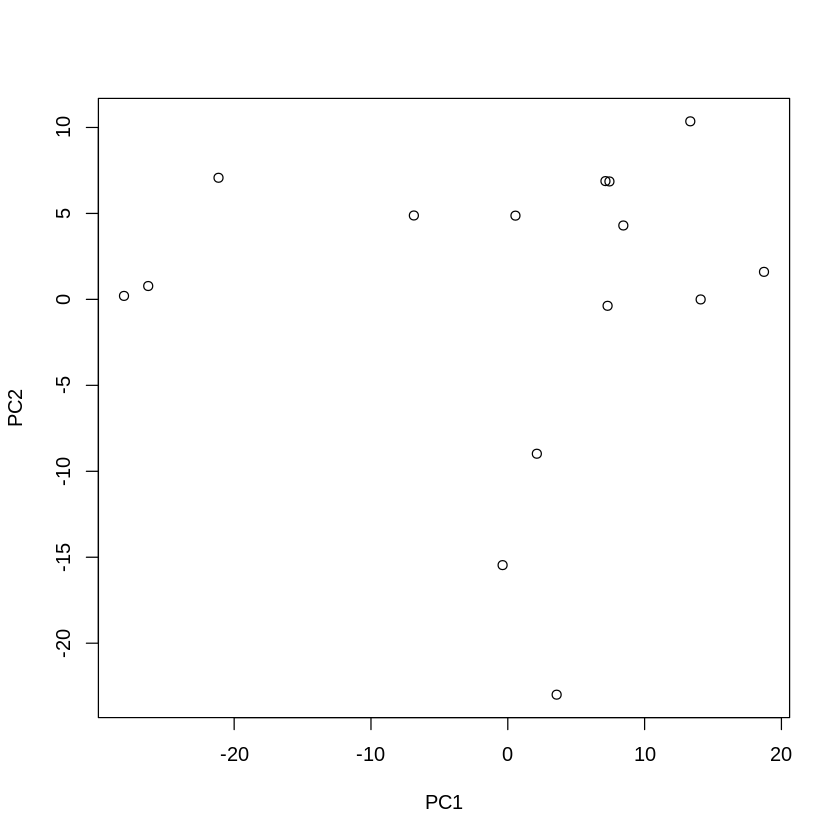

In [ ]:
plot(pca$x , pca$y )


This R code generates a 2D scatter plot using the scores obtained from the PCA (Principal Component Analysis) object pca. The "pca$$x contains the principal component scores for each sample, and "pca$y" contains the variance explained by each principal component. The resulting plot visualizes the samples in the principal component space.

## **7. Plot PCA using autoplot function.**

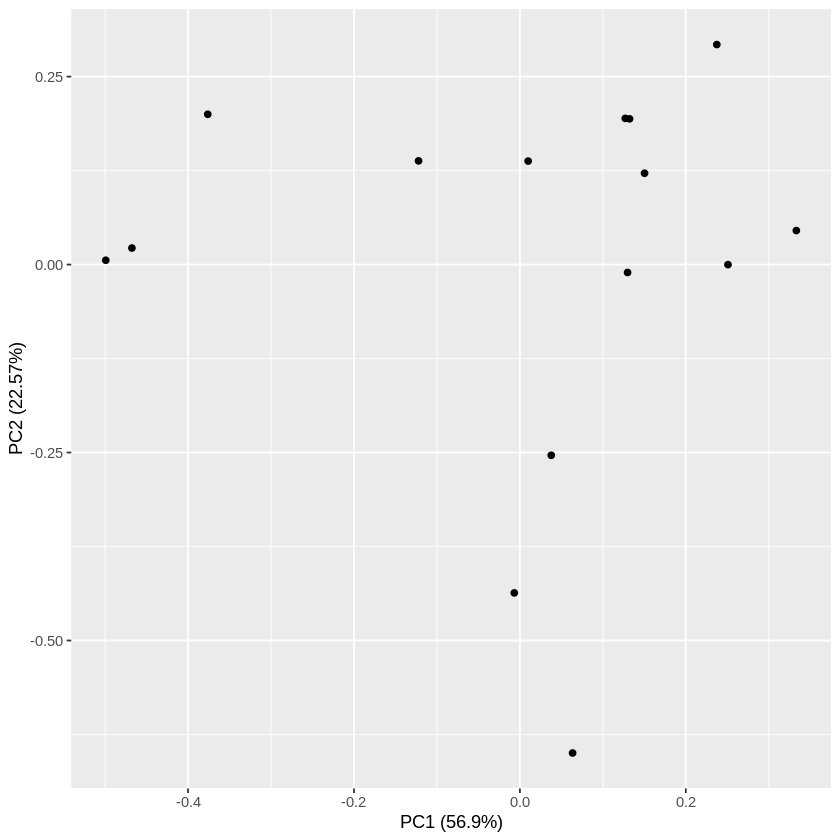

In [ ]:
pca <- prcomp(expressionst)
autoplot(pca)


This R code performs Principal Component Analysis (PCA) on the transposed expression matrix expressionst using the prcomp function, and then generates an autoplot visualization of the PCA results using the autoplot function. The resulting plot provides insights into the variance and relationships among samples in the principal component space.

### **7.1. Add color and labels**

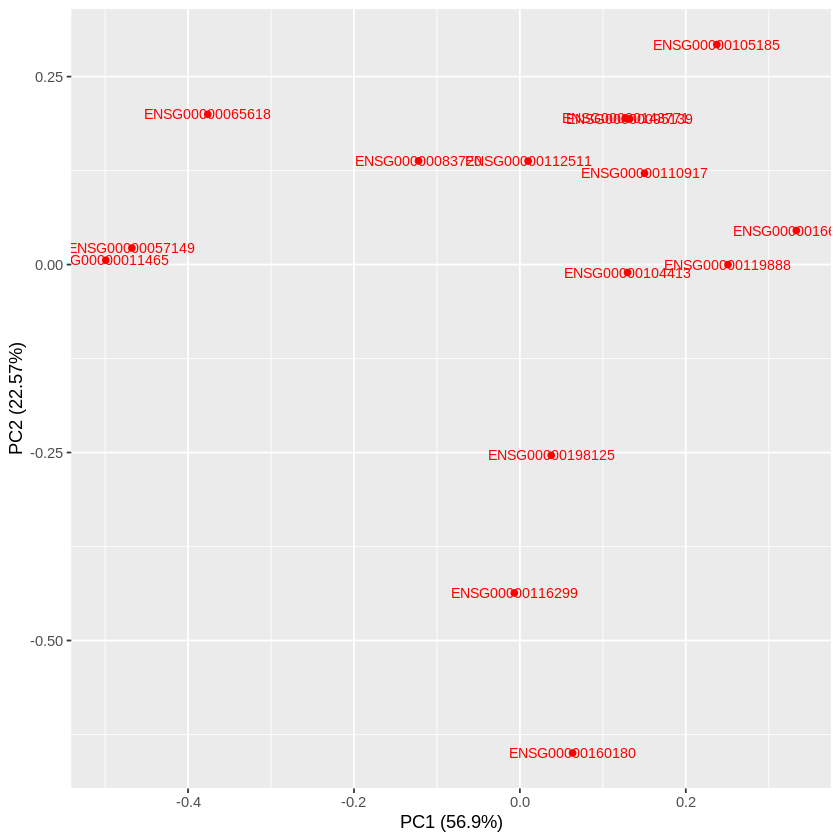

In [ ]:
autoplot(pca, label = TRUE, label.size = 3 , colour = "red" )


This R code utilizes the autoplot function from the "ggfortify" package to generate an enhanced visualization of the Principal Component Analysis (PCA) results stored in the pca object. The plot includes labels, with label size set to 3, and sample points colored in red for better interpretation of the PCA components.

### **7.2. Integrating Labels and Loadings**

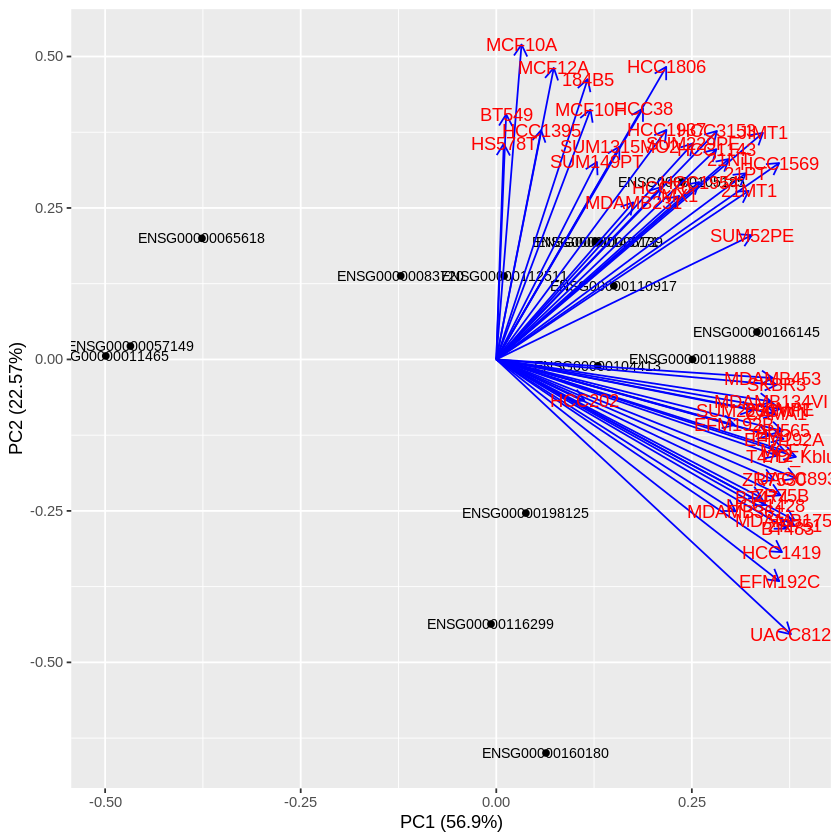

In [ ]:
autoplot(pca, label = TRUE, label.size = 3 , loadings = TRUE, loadings.label = TRUE, loadings.colour = "blue" )


This R code employs the autoplot function to create an enhanced visualization of Principal Component Analysis (PCA) results stored in the pca object. It includes sample labels with a size of 3, displays loadings (contribution of each variable to principal components), and assigns a blue color to the loadings for a more comprehensive representation of the PCA analysis.

## **8. Plot PCA in 3D**

In [ ]:
install.packages("scatterplot3d")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



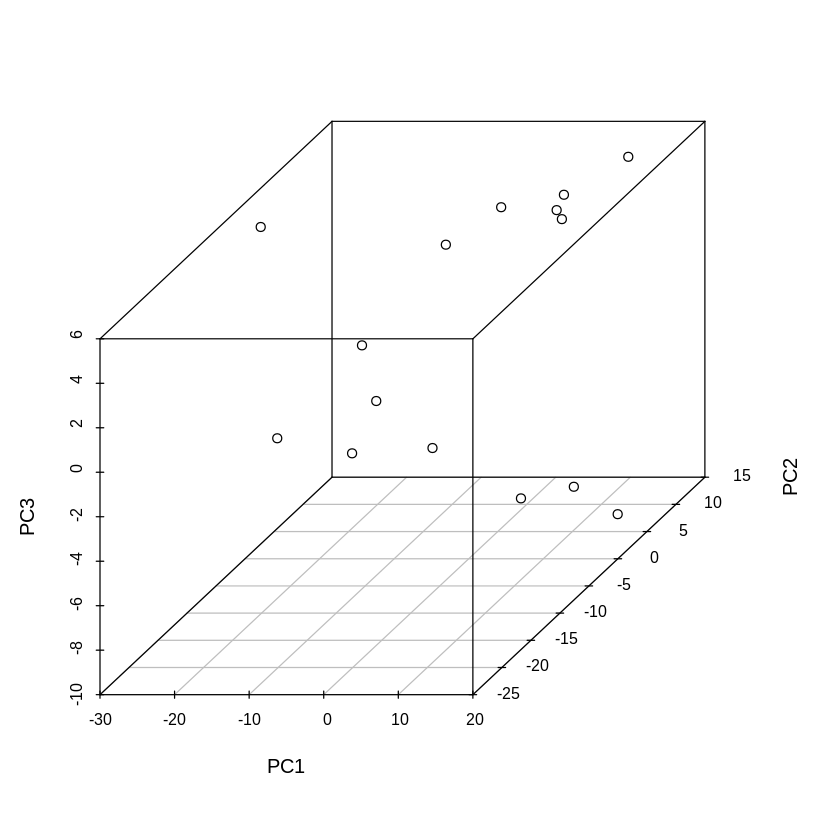

In [ ]:
library(scatterplot3d)
PCA_table <- as.matrix(pca$x)
scatterplot3d(PCA_table[, 1 : 3 ], angle= 55 )


This R code loads the "scatterplot3d" library and converts the PCA scores from the first three principal components (pca$x[, 1:3]) into a matrix named PCA_table. It then creates a 3D scatter plot using the scatterplot3d function, visualizing the samples in the space defined by the first three principal components. The angle=55 parameter sets the viewing angle for better visualization.

## **9. PCA plot with ggfortify library.**

### **9.1. Load libraries**

In [ ]:
library(ggfortify)
library(cluster)


These lines of R code load the "ggfortify" and "cluster" libraries, making their functions available for use in the R environment. "ggfortify" enhances visualization of statistical models using ggplot2, while "cluster" provides functions for cluster analysis.

### **9.2 Load data**

In [ ]:
data <- read.table('https://raw.githubusercontent.com/PineBiotech/bioinformatics/master/15gene_transposed.txt',
                    sep='\t', header=TRUE, check.names=FALSE, stringsAsFactors=TRUE, row.names=1)
head(data)

,Group,ENSG00000011465,ENSG00000057149,ENSG00000065618,ENSG00000083720,ENSG00000095139,ENSG00000104413,ENSG00000105185,ENSG00000110917,ENSG00000112511,ENSG00000116299,ENSG00000119888,ENSG00000143771,ENSG00000160180,ENSG00000166145,ENSG00000198125
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
184A1,Normal-like,0.0000000,2.0393228,8.5054778,5.199763,5.980138,5.659199,7.047574,4.524903,3.148846,0.9710225,2.733510,5.989013,0.0000000,7.008835,0.0000000
184B5,Normal-like,0.4543564,2.2747442,9.1342482,3.975563,4.938758,5.836266,6.540624,4.338774,3.973675,0.7653086,4.037024,6.154827,0.1110891,7.849484,0.9710225
21MT1,Basal,0.0000000,0.7740705,0.7139143,3.253808,5.641512,5.356153,6.480210,5.426652,4.182265,0.5461653,7.050554,5.337562,1.3106163,7.618438,2.8875448
21NT,Basal,0.1375042,2.3704483,0.3448520,3.702386,5.797871,5.531552,6.560437,5.544308,4.923217,0.6958502,7.025721,5.684753,0.5655943,7.740913,2.3621453
21PT,Basal,0.0000000,1.4007598,0.2869750,3.727587,5.884528,5.443308,6.519823,5.675906,4.817478,0.4114473,6.875789,5.451148,1.0635283,7.775772,2.7552454
600MPE,Luminal,0.0000000,0.0000000,0.2631667,5.161704,5.294528,6.418830,6.587189,5.865811,5.000971,6.2773670,8.207277,6.410912,6.4722882,6.866856,3.7023865



This R code reads a tab-separated data file from a specified URL into a data frame named data. The head function is then used to display the first few rows of this data frame, providing a quick preview of the imported dataset.

### **9.3 Create count matrix without Group information.**

In [ ]:
df <- data[2:16]


This R code creates a new data frame named df by selecting columns 2 through 16 from the existing data frame data. The resulting df contains a subset of columns from the original dataset.

### **9.4 Generate PCA components after log scale transformation of the data.**

In [ ]:
pca_res <- prcomp(df, scale.=TRUE)


This R code applies Principal Component Analysis (PCA) to the data frame df using the prcomp function, with the option scale = TRUE indicating that the variables should be scaled (centered and divided by their standard deviation) before performing the PCA. The results are stored in the pca_res object.

### **9.5 Plot PCA for transformed data**

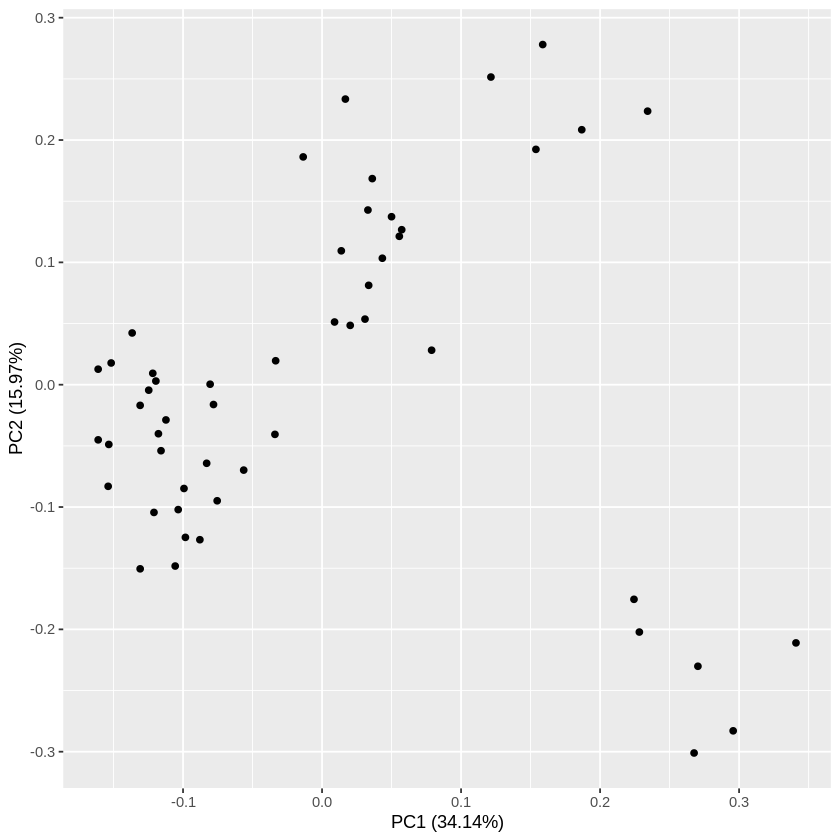

In [ ]:
plot <- autoplot(pca_res)
plot(plot)


This R code generates an autoplot visualization of the Principal Component Analysis (PCA) results stored in the pca_res object using the autoplot function from the "ggfortify" package. The resulting plot provides insights into the variance and relationships among samples in the principal component space.

### **9.6. Add colors to the plot.**

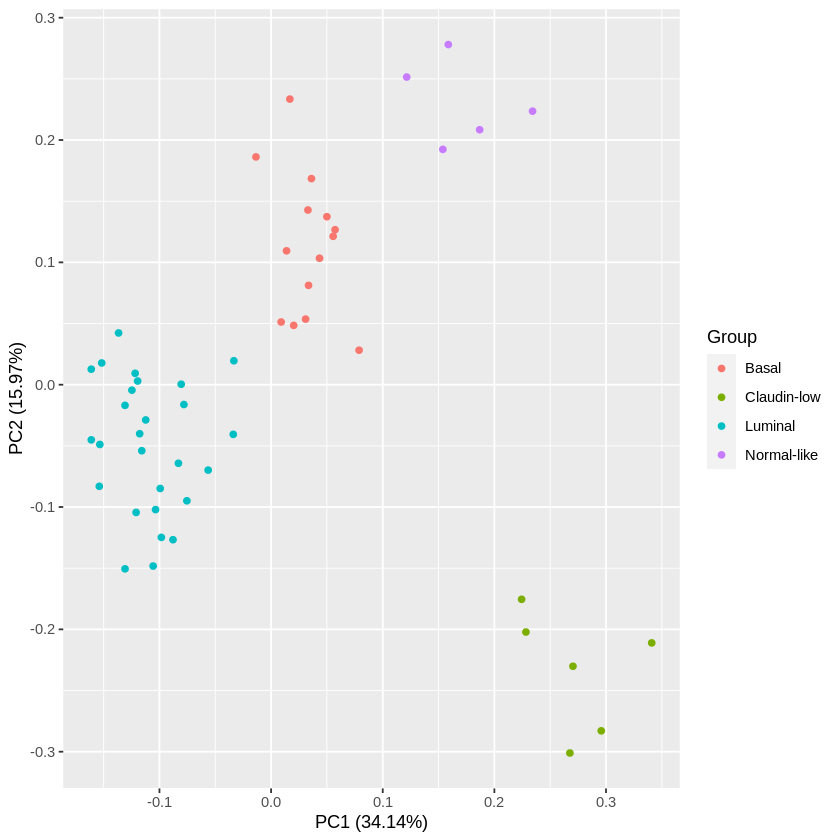

In [ ]:
plot1 <- autoplot(pca_res, data=data, frame=F, colour='Group')
plot(plot1)


This R code generates an enhanced autoplot visualization of the Principal Component Analysis (PCA) results stored in the pca_res object using the autoplot function. The data=data argument specifies the original data frame, frame=F removes the frame around the plot, and colour='Group' colors the points based on the 'Group' variable in the data frame. The resulting plot provides a clearer separation of groups in the principal component space.

### **9.7 Add labels to samples**

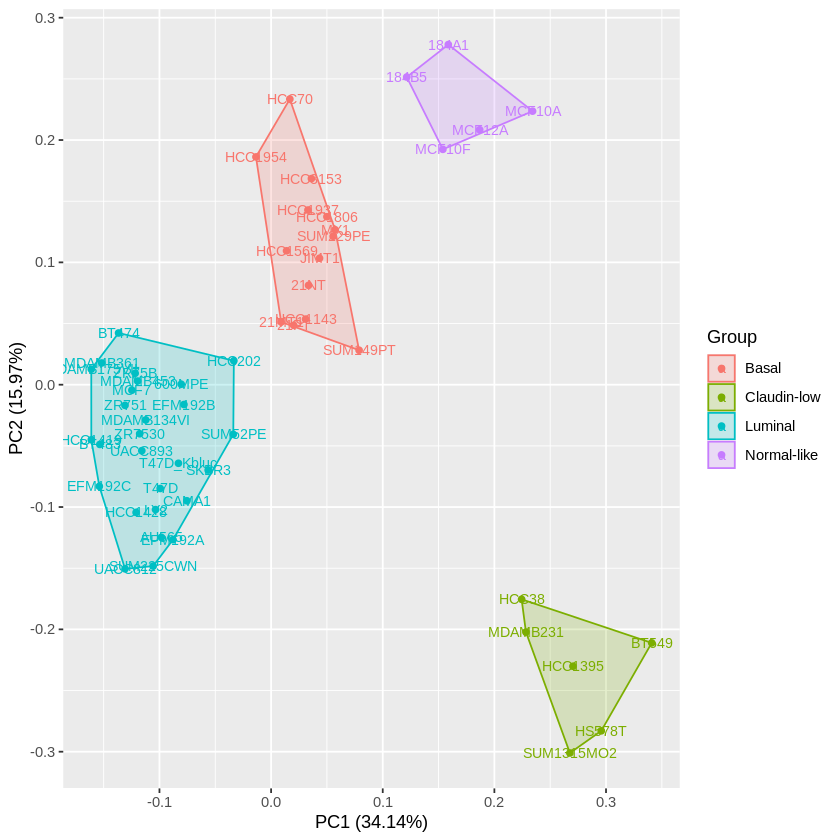

In [ ]:
plot2 <- autoplot(pca_res, data=data, frame=TRUE, colour='Group', label=TRUE, label.size=3)
plot(plot2)


This R code generates an enhanced autoplot visualization of the Principal Component Analysis (PCA) results stored in the pca_res object using the autoplot function. The data=data argument specifies the original data frame, frame=TRUE adds a frame around the plot, colour='Group' colors the points based on the 'Group' variable in the data frame, and label=TRUE adds labels to the points. The label.size=3 parameter sets the size of the labels. The resulting plot provides a comprehensive view of the PCA with labeled and colored points.

## **10. Barplot of PCA components**

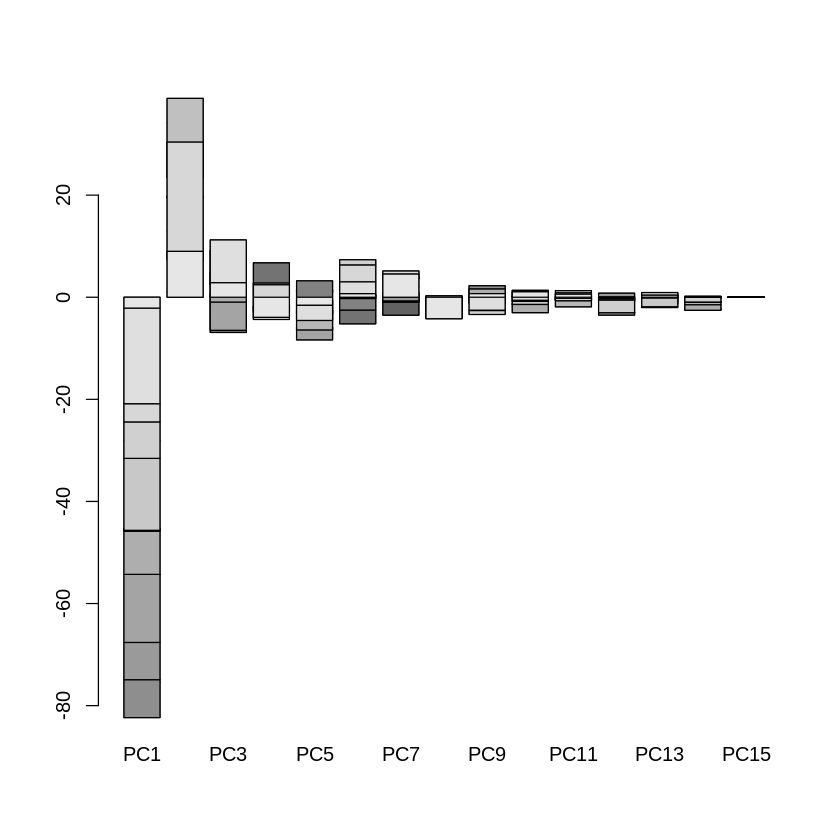

In [ ]:
barplot(pca$x)

## **11. Go beyond the basics**

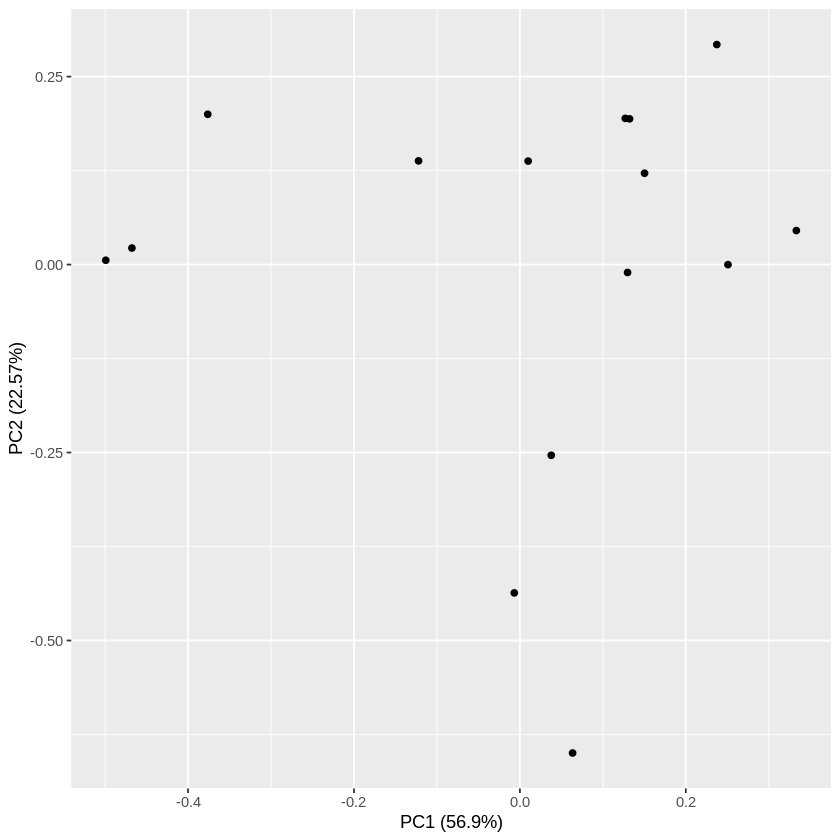

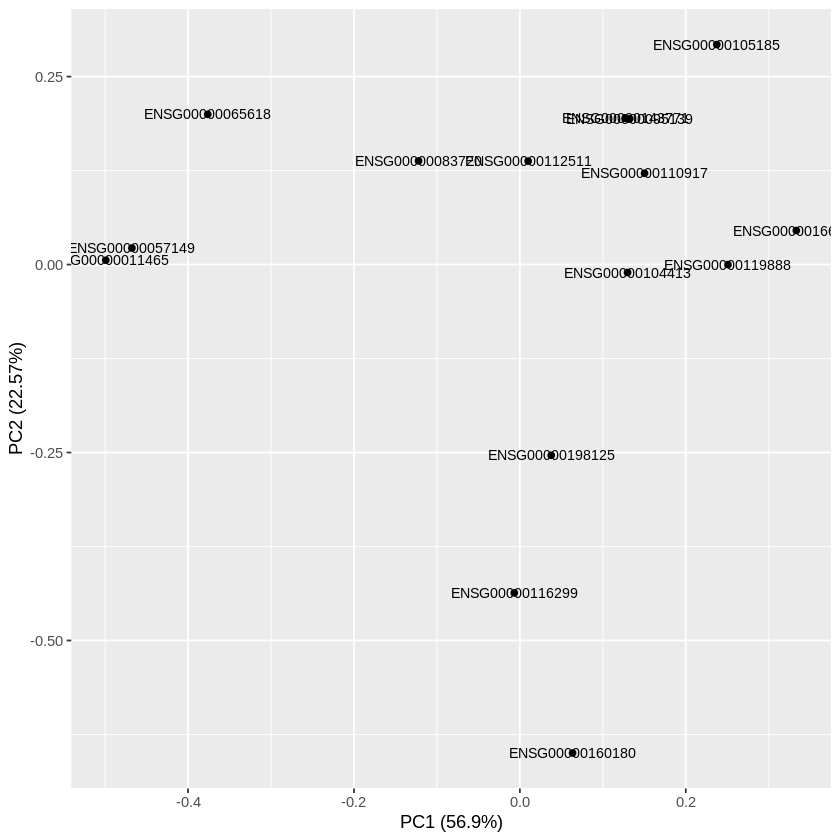

In [ ]:
#perform PCA:
pca <- prcomp(expressionst)
#basic PCA scatter plot:
autoplot(pca)
#adding labels:
autoplot(pca, label = TRUE , label.size = 3 )

This R code performs Principal Component Analysis (PCA) on the transposed expression matrix (expressionst) using the prcomp function. It then creates a basic PCA scatter plot using the autoplot function from the "ggfortify" package. Subsequently, an enhanced scatter plot is generated by adding labels to the points using the label=TRUE and label.size=3 arguments in the autoplot function. The resulting plot provides a visual representation of sample distribution in the principal component space with labeled data points.

### **11.1 Perform kmeans**

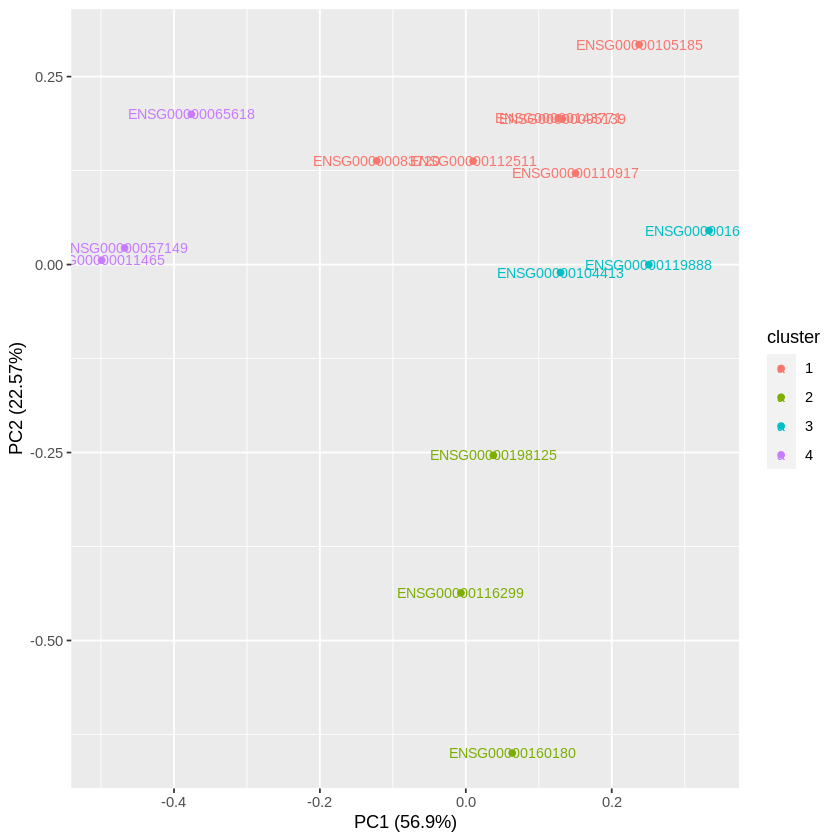

In [ ]:
#clustering
pca <- kmeans(expressionst, 4 )
autoplot(pca, data=expressionst, label = TRUE , label.size = 3 )

This R code uses the kmeans function to perform k-means clustering on the data in expressionst with the specified number of clusters (4). The resulting cluster assignments are stored in the 'cluster' column, and then autoplot is used to create a scatter plot of the first two principal components (PC1 and PC2), color-coded by the cluster assignments. The label and label.size parameters are used to display cluster labels in the plot.

Too few points to calculate an ellipse
Too few points to calculate an ellipse
Too few points to calculate an ellipse


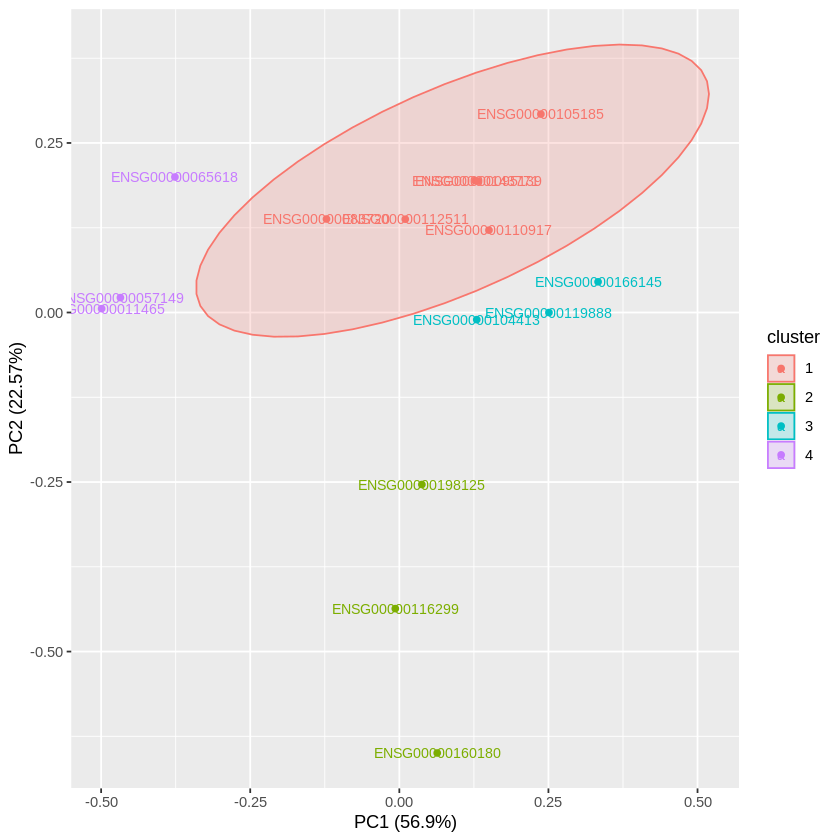

In [ ]:
autoplot(pca, data=expressionst, frame= TRUE , label = TRUE , label.size = 3 , frame.type= 'norm' )


This R code utilizes the autoplot function from the ggplot2 package to create a scatter plot of the first two principal components (PC1 and PC2) from a k-means clustering analysis. The pca object likely contains the results of the clustering, and the data in expressionst is used for plotting. The frame, label, label.size, and frame.type parameters are employed to add visual elements to the plot, such as labeling points, adjusting label size, and framing the clusters with ellipses based on the normal distribution.

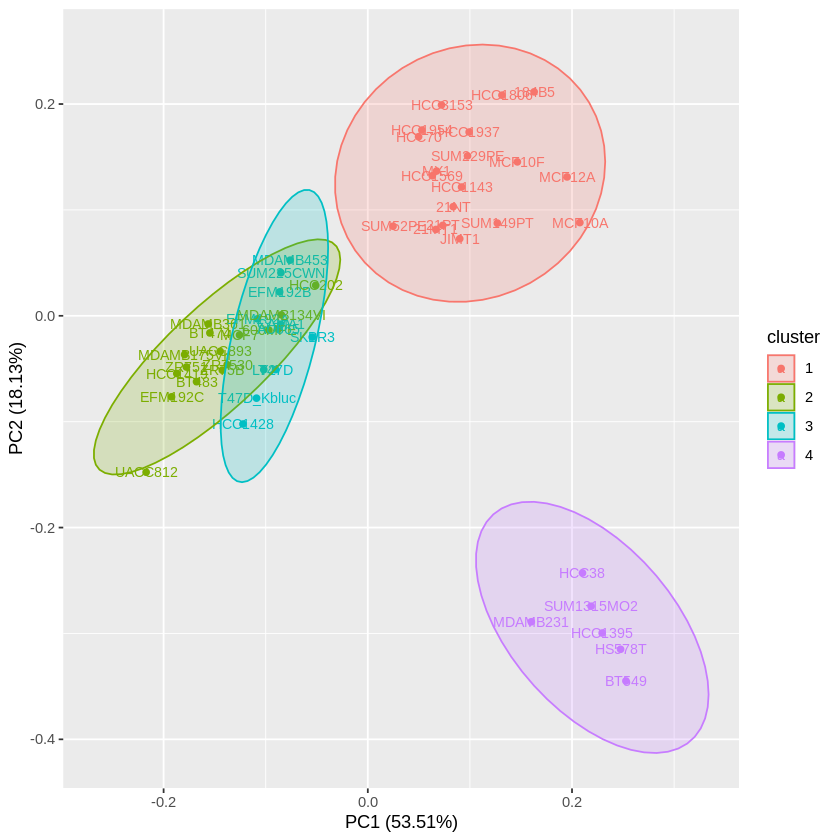

In [ ]:
scatterplotobject <- clara(expressions , 4 )
autoplot(scatterplotobject, label = TRUE, label.size = 3 , frame = TRUE, frame.type = 'norm' )


This R code uses the clara function from the cluster package to perform a clustering analysis on the data in the expressions dataset with four clusters. The resulting clustering object (scatterplotobject) is then visualized using the autoplot function from the factoextra package. The scatter plot includes labels, adjusted label size, and framed clusters based on the normal distribution. This allows for the exploration and visualization of the clustering structure in the data.

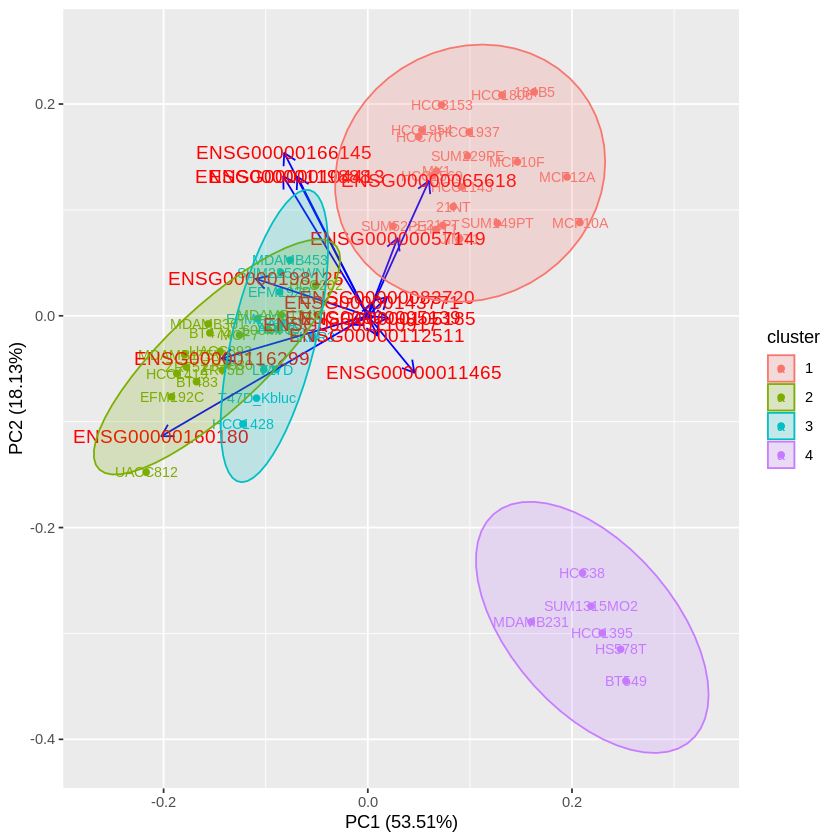

In [ ]:
scatterplotobject <- clara(expressions , 4 )
autoplot(scatterplotobject,label = TRUE, label.size = 3 , frame = TRUE, frame.type = 'norm' , loadings = TRUE, loadings.label = TRUE,loadings.colour = 'blue' , loadings.label.size = 4 )


This R code uses the clara function from the cluster package to perform a clustering analysis on the data in the expressions dataset with four clusters. The resulting clustering object (scatterplotobject) is then visualized using the autoplot function from the factoextra package. The scatter plot includes labels, adjusted label size, framed clusters based on the normal distribution, and loadings (indicators of variable importance) with blue color and labels. This visualization helps explore the clustering structure and variable contributions in the data.